# 과제 : 데이터 분석

<데이터 분석 질문>

1.    기본 분석 및 데이터 전처리를 수행하고 결과를 설명하세요.


2.    상세 분석 및 프로세스 분석

         i.            현재 수리 프로세스가 어떻게 진행되고 있는지 설명하세요.

       ii.            현재 프로세스의 문제점(병목현상, 반복작업 등)을 분석하세요.

     iii.            케이스 소요 시간에 영향을 미치는 데이터 요소가 있다면, 이를 제시하고 근거를 설명하세요. 


3.    현재 프로세스를 개선할 수 있는 방안에 대해 서술하세요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# mobile data
data_path = "repair2.csv"
data = pd.read_csv(data_path)
data.head()

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-01-08,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,2020-01-10,11:33


In [3]:
# 전체 컬럼의 결측지 확인
data.isnull().sum()

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64

|변수 명|내용|구분|
|	----	|	----	|	----	|
|	CaseID	|	집 수리 요청 접수 번호	|	int |
|	TaskID	|	업무	|	Object	|
|	Originator	|	업무 담당자 |	Object	|
|	Eventtype	|	업무의 시작(start)과 끝(complete)을 표시	|	Object	|
|	Contact	|	집 수리 요청의 요청 채널('Phone','Web','Personal',Letter')	|	Object	|
|	RepairType	|	수리 방식('P, 'E', 'B')|	Object	|
|	ObjectKey	|	 수리 대상 집 key	|	float	|
|	RepairInternally	|	내부 수리 여부('True', 'False')	|	object	|
|	EstimatedRepairTime	|	예상 수리 시간(60.0 ~ 480.0)	|	float	|
|	RepairCode	|	수리 종류(1.0 ~ 4.0)	|	float	|
|	RepairOK	|	수리 정상 종류 여부('True')	|	object	|
|	Date	|	업무 수행 일자	|	object	|
|	Time	|	업무 수행 시각	|	object	|


### 1. 기본 분석 및 데이터 전처리를 수행하고 결과를 설명하세요.

In [27]:
data.isna().sum()

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64

###### 1. 단별량 분석   ( 결측지는 우선 무시하고 시행 ) : 특정 컬럼이 약 12000개 정도 결측지가 있어서 추후 처리방법 고안

##### - TaskID

In [122]:
data[["taskID"]].isna().sum()

taskID    2
dtype: int64

In [125]:
data["taskID"].value_counts()

ArrangeSurvey             1854
MakeTicket                1854
Survey                    1854
InternRepair              1094
FirstContact               999
TicketReady                927
RepairReady                927
ReadyInformClient          927
SendTicketToFinAdmin       927
InformClientSurvey         926
ImmediateRepair            766
ExternRepair               132
InformClientWrongPlace      73
Name: taskID, dtype: int64

In [146]:
TaskID = data["taskID"][data["taskID"].isna() == False]

In [147]:
TaskId_cnt = TaskID.value_counts()[:5]

<BarContainer object of 5 artists>

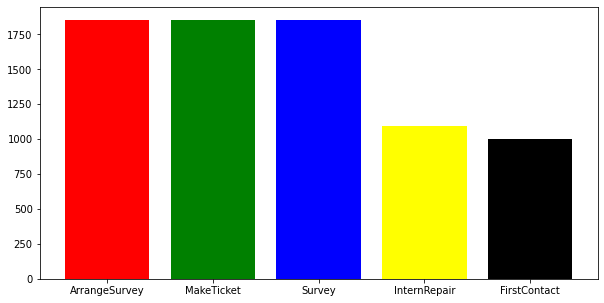

In [148]:
plt.figure(figsize=(10,5))
plt.bar(TaskId_cnt.index, TaskId_cnt.values, color= ["red","green","blue","yellow","black"])

- 주요 업무로는 ArrangeSurvery, MakeTicket, Survey, InternRepair, FirstContact

##### - Originator

In [152]:
data[['originator']].isna().sum()

originator    2
dtype: int64

In [153]:
Originator = data["originator"][data["originator"].isna() == False]

In [160]:
Originator_cnt = Originator.value_counts()[:4] # 5위서부터는 비등한 수치

<BarContainer object of 4 artists>

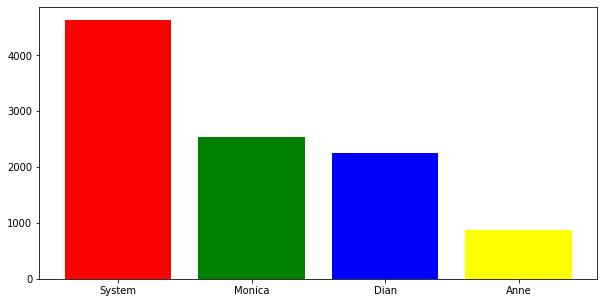

In [161]:
plt.figure(figsize=(10,5))
plt.bar(Originator_cnt.index, Originator_cnt.values, color= ["red","green","blue","yellow","black"])

- 업무를 가장 많이 담당하는 담당자는 System, Monica, Dian, Anne

##### -  Eventtype	

In [163]:
data[['eventtype']].isna().sum()

eventtype    5
dtype: int64

In [164]:
Eventtype = data["eventtype"][data["eventtype"].isna() == False]

In [165]:
Eventtype

0        complete
1        complete
2        complete
3           start
4        complete
           ...   
13257    complete
13258       start
13259       start
13260       start
13261    complete
Name: eventtype, Length: 13257, dtype: object

In [167]:
Eventtype_cnt = Eventtype.value_counts()

<BarContainer object of 2 artists>

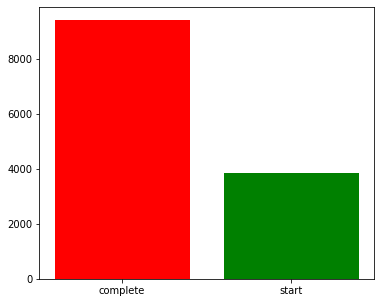

In [170]:
plt.figure(figsize=(6,5))
plt.bar(Eventtype_cnt.index, Eventtype_cnt.values, color= ["red","green"])

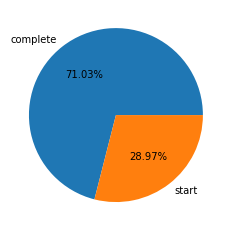

In [194]:
plt.pie(Eventtype_cnt.values, labels = Eventtype_cnt.index, autopct = "%.2f%%")
plt.show()

- 약 70% 이상이 집 수리를 완료 했음을 알 수 있음

##### -  Contact ( 결측지가 너무 많음으로 참고사항으로만.... )

In [195]:
data[['contact']].isna().sum()

contact    12262
dtype: int64

In [201]:
Contact = data["contact"][data["contact"].isna() == False]
Contact_cnt = Contact.value_counts()
print(sum(Contact_cnt))

1000


<BarContainer object of 4 artists>

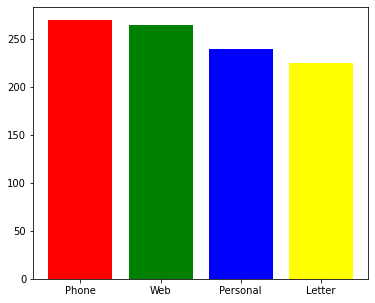

In [199]:
plt.figure(figsize=(6,5))
plt.bar(Contact_cnt.index, Contact_cnt.values, color= ["red","green","blue","yellow"])

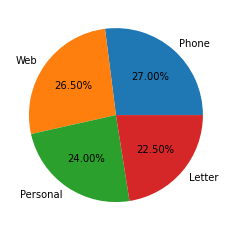

In [202]:
plt.pie(Contact_cnt.values, labels = Contact_cnt.index, autopct = "%.2f%%")
plt.show()

- Phone, Web 사용이 가장 많지만 그렇다고 압도적으로 많은 것은 아님 ( 데이터 결측지가 너무 많기 때문에 비율로 확인하는 것이 좋을 것 같습니다)

##### -  RepairType	 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [33]:
data[['RepairType']].isna().sum()

RepairType    12335
dtype: int64

In [34]:
RepairType = data["RepairType"][data["RepairType"].isna() == False]
RepairType_cnt = RepairType.value_counts()
print(sum(RepairType_cnt))

927


<BarContainer object of 3 artists>

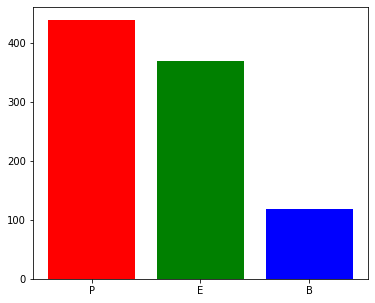

In [36]:
plt.figure(figsize=(6,5))
plt.bar(RepairType_cnt.index, RepairType_cnt.values, color= ["red","green","blue"])

##### -  RepairType	 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [4]:
data[['RepairType']].isna().sum()

RepairType    12335
dtype: int64

In [6]:
RepairType = data["RepairType"][data["RepairType"].isna() == False]
RepairType_cnt = RepairType.value_counts()
print(sum(RepairType_cnt))

927


<BarContainer object of 3 artists>

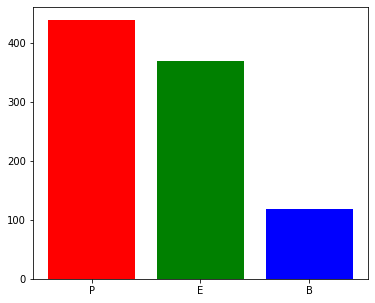

In [8]:
plt.figure(figsize=(6,5))
plt.bar(RepairType_cnt.index, RepairType_cnt.values, color= ["red","green","blue"])

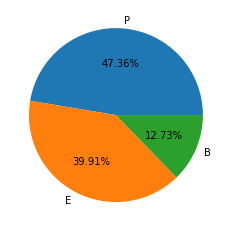

In [9]:
plt.pie(RepairType_cnt.values, labels = RepairType_cnt.index, autopct = "%.2f%%")
plt.show()

- P > E > B 순으로 수리 방식이 진행되고 있습니다. ( 데이터 결측지가 너무 많기 때문에 비율로 확인하는 것이 좋을 것 같습니다)

##### -  ObjectKey	 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [11]:
data[['objectKey']].isna().sum()

objectKey    12335
dtype: int64

In [46]:
ObjectKey = data["objectKey"][data["objectKey"].isna() == False]

<function matplotlib.pyplot.show(close=None, block=None)>

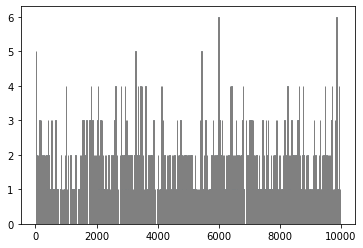

In [32]:
plt.hist(ObjectKey,bins=890,edgecolor="grey")
plt.show

In [24]:
len(data["objectKey"].value_counts())

890

- 보통 한 번 이상 수리 요청을 한 집이 많음을 확인할 수 있습니다.

##### -  RepairInternally	 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [34]:
data[['RepairInternally']].isna().sum()

RepairInternally    12335
dtype: int64

In [35]:
RepairInternally = data["RepairInternally"][data["RepairInternally"].isna() == False]
RepairInternally_cnt = RepairInternally.value_counts()
print(sum(RepairInternally_cnt))

927


<BarContainer object of 2 artists>

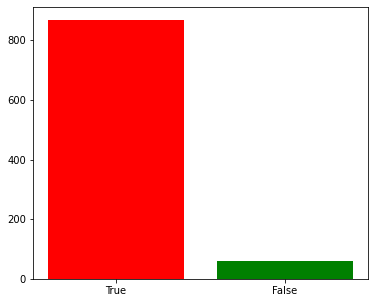

In [41]:
plt.figure(figsize=(6,5))
plt.bar(["True", "False"], RepairInternally_cnt.values, color= ["red","green",])

- 대부분의 신청자들이 내부수리 과정을 거쳤음을 알 수 있습니다.

##### -  EstimatedRepairTime		 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [42]:
data[['EstimatedRepairTime']].isna().sum()

EstimatedRepairTime    12335
dtype: int64

In [47]:
EstimatedRepairTime = data["EstimatedRepairTime"][data["EstimatedRepairTime"].isna() == False]

<function matplotlib.pyplot.show(close=None, block=None)>

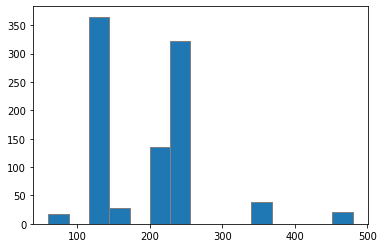

In [52]:
plt.hist(EstimatedRepairTime,bins=15,edgecolor="grey")
plt.show

- 예상 수리 시간은 약120분, 약 200분 ~ 250분정도가 가장 많이 걸리는 것을 알 수 있습니다

##### -  RepairCode		 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [53]:
data[['RepairCode']].isna().sum()

RepairCode    12335
dtype: int64

In [56]:
# 범주화 하기 위해 값 변경하기

data[['RepairCode']] = data[['RepairCode']].replace([1.0,2.0,3.0,4.0],["1","2","3","4"])

In [57]:
RepairCode = data["RepairCode"][data["RepairCode"].isna() == False]
RepairCode_cnt = RepairCode.value_counts()
print(sum(RepairCode_cnt))

927


<BarContainer object of 4 artists>

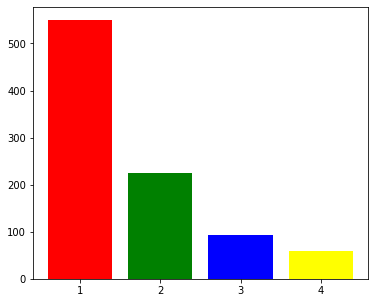

In [58]:
plt.figure(figsize=(6,5))
plt.bar(RepairCode_cnt.index, RepairCode_cnt.values, color= ["red","green","blue","yellow"])

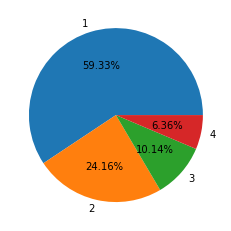

In [59]:
plt.pie(RepairCode_cnt.values, labels = RepairCode_cnt.index, autopct = "%.2f%%")
plt.show()

- 수리의 종류는 1 > 2 > 3 > 4 순인데 1 유형이 앞도적으로 많음을 알 수 있습니다.

##### -  RepairOK	 ( 결측지가 너무 많음으로 참고사항으로만.... )

In [61]:
data[['RepairOK']].isna().sum()

RepairOK    11408
dtype: int64

In [62]:
RepairOK = data["RepairOK"][data["RepairOK"].isna() == False]
RepairOK_cnt = RepairOK.value_counts()
print(sum(RepairOK_cnt))

1854


<BarContainer object of 1 artists>

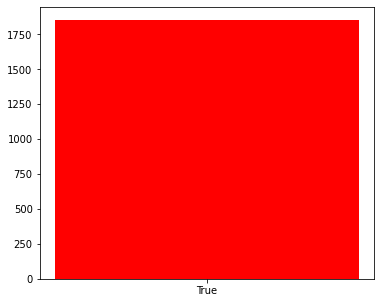

In [71]:
plt.figure(figsize=(6,5))
plt.bar(["True"], RepairOK_cnt.values, color= ["red","blue"])

In [69]:
RepairOK.value_counts()

True    1854
Name: RepairOK, dtype: int64

- 수리 정상 종류 여부 경우, True 값밖에 없어서 나중에 데이터 마이닝 시행시 컬럼을 삭제하고 하면 좋을것 같습니다.

단별량 분석 정리


* TaskID : ArrangeSurvery, MakeTicket, Survey, InternRepair, FirstContact 가 가장 많은 업무
* originator : System, Monica, Dian, Anne 가 가장 많은 업무를 담당 (System 같은 경우 압도적으로 많은 업무를 맡음 --> 아마 고객들에게 가장 인기 있고 실력을 인정 받은 수리사 일것 같음)
* eventtype : 대부분이 업무를 수행하지만 아직 30%는 미수행 --> 원인을 찾아봐야 함
* contact : Phone, Web 사용이 가장 많지만 모든 컨택 수단들이 고르게 사용 되고 있음( 결측지가 너무 많은 관계로 데이터가 적음 ) 
* RepairType : 수리방식은 주로 P 방식을 가장 많이 하고있습니다.
* EstimatedRepairTime : 수리시간은 약 120분, 200분~250분 정도 소요됩니다.
* RepairCode : 수리 종류로는 1.0이 가장 많고 그 다음으로 2.0 3.0 4.0입니다.

### 결측지 채우고 전처리 후  repair3로 데이터 저장

In [35]:
df = data[["caseID","taskID","originator","eventtype","date","time"]]

In [41]:
df.isna().sum()

caseID         0
taskID         0
originator     2
eventtype      5
date          13
time          13
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   caseID      13262 non-null  int64 
 1   taskID      13260 non-null  object
 2   originator  13260 non-null  object
 3   eventtype   13257 non-null  object
 4   date        13249 non-null  object
 5   time        13249 non-null  object
dtypes: int64(1), object(5)
memory usage: 621.8+ KB


In [25]:
# taskID 채우기
print(df["taskID"].value_counts())
df["taskID"].fillna("Survey",inplace=True)

Survey                    1854
MakeTicket                1854
ArrangeSurvey             1854
InternRepair              1094
FirstContact               999
RepairReady                927
SendTicketToFinAdmin       927
ReadyInformClient          927
TicketReady                927
InformClientSurvey         926
ImmediateRepair            766
ExternRepair               132
InformClientWrongPlace      73
Name: taskID, dtype: int64


In [40]:
df["taskID"].isna().sum()

0

In [44]:
# originator 채우기
print(df["originator"].value_counts())
df["originator"].fillna("System",inplace=True)

System     4635
Monica     2535
Dian       2246
Anne        865
Jacky       438
Barbara     428
John        396
Cindy       388
Paul        387
Edd         372
Ben         120
Lex         112
Nick        108
Eric         98
DoIt         66
FixIt        66
Name: originator, dtype: int64


In [45]:
df["originator"].isna().sum()

0

In [47]:
# eventtype 채우기
print(df["eventtype"].value_counts())
df["eventtype"].fillna("complete",inplace=True)

complete    9416
start       3841
Name: eventtype, dtype: int64


In [48]:
df["eventtype"].isna().sum()

0

In [52]:
# date 채우기
print(df["date"].value_counts())
df["date"].fillna("1970-01-07",inplace=True)

1970-01-07    1338
1970-01-04    1337
1970-01-05    1334
1970-01-03    1282
1970-01-02    1277
              ... 
2021-02-10       1
2021-08-07       1
2022-01-06       1
2021-02-26       1
2022-04-03       1
Name: date, Length: 881, dtype: int64


In [53]:
df["date"].isna().sum()

0

In [55]:
# time 채우기
print(df["time"].value_counts())
df["time"].fillna("7:13",inplace=True)

7:13     28
10:43    27
7:11     24
4:15     24
2:02     24
         ..
8:29      1
2:42      1
8:17      1
6:15      1
8:38      1
Name: time, Length: 1427, dtype: int64


In [56]:
df["time"].isna().sum()

0

In [58]:
df

,caseID,taskID,originator,eventtype,date,time
0,419,InformClientSurvey,System,complete,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,2020-01-08,16:20
3,18,Survey,Edd,start,2020-01-09,6:55
4,852,Survey,Edd,complete,2020-01-10,11:33
...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,1970-01-07,0:16
13258,25,ArrangeSurvey,Dian,start,1970-01-02,7:48
13259,762,ArrangeSurvey,Monica,start,1970-01-03,11:53
13260,12,InternRepair,Cindy,start,1970-01-08,18:10


In [59]:
# complte 데이터만 남기지
df = df[df.eventtype != 'start']

In [60]:
# 프로세싱 마이닝 할 데이터 따로 저장
df.to_csv("repair3.csv")